In [1]:
# tensorflowのインポート
import tensorflow as tf

# MNISTデータセットの読み込み
(x_trains, y_trains), (x_tests, y_tests) = tf.keras.datasets.mnist.load_data()

# 訓練データ
# (60000, 28, 28)の3階テンソルを(60000, 28, 28, 1)の4階テンソルに変換
x_trains = x_trains.reshape(60000, 28, 28, 1)
# 訓練データをfloat32(浮動小数点数)型に変換
x_trains = x_trains.astype('float32')
# データを255で割って0から1.0の範囲に変換
x_trains /= 255

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
import numpy as np

# フィルターの作成

# 縦方向のエッジを検出するフィルター
vertical_edge_fil = np.array([[-2, 1, 1],
                              [-2, 1, 1], 
                              [-2, 1, 1]],
                             dtype=ﬂoat)
# 横方向のエッジを検出するフィルター
horizontal_edge_fil = np.array([[1, 1, 1], 
                                [1, 1, 1],
                                [-2, -2, -2]],
                               dtype=ﬂoat)

In [3]:
# フィルターの適用

# フィルターを適用する画像のインデックス
img_id = 42

# フィルターを適用する画像のインデックス
img_id = 42
# 画像のピクセル値を取得
img_x = x_trains[img_id, :, :, 0]
img_height = 28 # 画像の縦サイズ
img_width = 28  # 画像の横サイズ
# 画像データを28×28の行列に変換
img_x = img_x.reshape(img_height, img_width)
# 縦エッジのフィルター適用後の値を代入する行列を用意
vertical_edge = np.zeros_like(img_x)
# 横エッジのィルター適用後の値を代入する行列を用意
horizontal_edge = np.zeros_like(img_x)

# 3×3のフィルターを適用
for h in range(img_height - 3):
    for w in range(img_width - 3):
        # フィルターを適用する領域を取得
        img_region = img_x[h:h + 3, w:w + 3]
        # 縦エッジのフィルターを適用
        vertical_edge[h + 1, w + 1] = np.dot(
            # 画像のピクセル値を1次元の配列に変換
            img_region.reshape(-1),
            # 縦エッジのフィルターを1次元の配列に変換
            vertical_edge_fil.reshape(-1)
        )
        # 横エッジのフィルターを適用
        horizontal_edge[h + 1, w + 1] = np.dot(
            # 画像のピクセル値を1次元の配列に変換
            img_region.reshape(-1),
            # 横エッジのフィルターを1次元の配列に変換
            horizontal_edge_fil.reshape(-1)
        )            

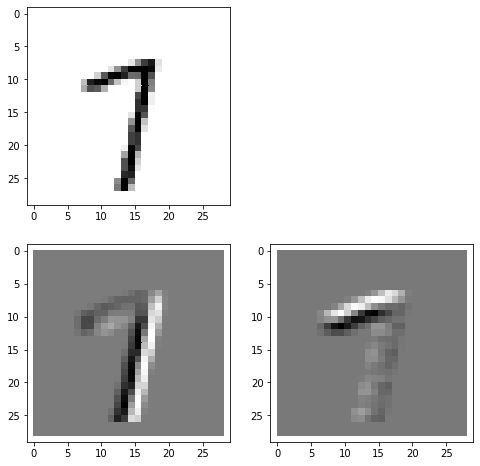

In [4]:
# フィルター適用前と適用後の画像を出力する
%matplotlib inline
import matplotlib.pyplot as plt

# プロットエリアのサイズを設定
plt.ﬁgure(ﬁgsize=(8, 8))
# プロット図を縮小して図の間のスペースを空ける
plt.subplots_adjust(wspace=0.2)
plt.gray()

# 2×2のグリッドの上段左に元の画像をプロット
plt.subplot(2, 2, 1)
# 色相を反転させてプロットする
plt.pcolor(1 - img_x)
plt.xlim(-1, 29) # x軸を-1~29の範囲
plt.ylim(29, -1) # y軸を29~-1の範囲

# 2×2のグリッドの下段左に縦エッジ適用後をプロット
plt.subplot(2, 2, 3)
# 色相を反転させてプロットする
plt.pcolor(-vertical_edge)
plt.xlim(-1, 29)
plt.ylim(29, -1)

# 2×2のグリッドの下段右に横エッジ適用後をプロット
plt.subplot(2, 2, 4)
# 色相を反転させてプロットする
plt.pcolor(-horizontal_edge)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()